<a href="https://colab.research.google.com/github/bholeneha/Text_Classification/blob/Fatima/NaiveBayes_TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings;
warnings.simplefilter('ignore')

In [2]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import regex
#from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!unzip sample_data/Data.zip
# I used this to add all the data files

Streaming output truncated to the last 5000 lines.
  inflating: Data/Politics/53371.txt  
  inflating: __MACOSX/Data/Politics/._53371.txt  
  inflating: Data/Politics/54378.txt  
  inflating: __MACOSX/Data/Politics/._54378.txt  
  inflating: Data/Politics/55066.txt  
  inflating: __MACOSX/Data/Politics/._55066.txt  
  inflating: Data/Politics/178802.txt  
  inflating: __MACOSX/Data/Politics/._178802.txt  
  inflating: Data/Politics/76330.txt  
  inflating: __MACOSX/Data/Politics/._76330.txt  
  inflating: Data/Politics/178355.txt  
  inflating: __MACOSX/Data/Politics/._178355.txt  
  inflating: Data/Politics/54191.txt  
  inflating: __MACOSX/Data/Politics/._54191.txt  
  inflating: Data/Politics/178433.txt  
  inflating: __MACOSX/Data/Politics/._178433.txt  
  inflating: Data/Politics/76456.txt  
  inflating: __MACOSX/Data/Politics/._76456.txt  
  inflating: Data/Politics/76442.txt  
  inflating: __MACOSX/Data/Politics/._76442.txt  
  inflating: Data/Politics/54185.txt  
  inflating: _

In [6]:
names = []
base = 'sample_data/Data/'
with os.scandir(base) as entries:
    for entry in entries:
        if(entry.is_file() == False):
            names.append(entry.name)

try:
  names.remove(".ipynb_checkpoints")
except:
  pass
names

['Entertainment', 'Crime', 'Science', 'Politics']

In [7]:
files = {}
unique = []
for name in names:
    path = base + name+'/'
    x = []
    with os.scandir(path) as entries:
        for entry in entries:
            if(entry.is_file()):
                x.append(entry.name)
    files[name] = x
    files[name].sort()

In [8]:
for k, v in files.items():
    print(k, len(v))

Entertainment 1053
Crime 1100
Science 4000
Politics 3001


In [9]:
################combined data for all the classess
data = {}
i = 0

for genre in files.keys() :
    texts = files[genre]
    for text in texts:
        if text in files[genre]:
            path = base + genre + '/' + text
            with open(path, "r", encoding = "latin1") as file:
                data[i] = file.readlines()
                i = i+1
            data[i-1] = [" ".join(data[i-1]), genre] 
#data
data = pd.DataFrame(data).T
print(data.shape)
data.columns = ['Text', 'Class']
data

(9154, 2)


Text          Class
0     \n Archive-name: ripem/faq\n Last-update: Sun,...  Entertainment
1     Approved: news-answers-request@MIT.EDU\n Conte...  Entertainment
2     Approved: news-answers-request@MIT.EDU\n Conte...  Entertainment
3     Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...  Entertainment
4     \n    Some sick part of me really liked that p...  Entertainment
...                                                 ...            ...
9149  \n In article <1th4mg$53f@usenet.INS.CWRU.Edu>...       Politics
9150  \n In article <1993May24.165636.29928@cirrus.c...       Politics
9151  Distribution: world\n Message-ID: <OAF.93May25...       Politics
9152  Message-ID: <OAF.93May25095940@klosters.ai.mit...       Politics
9153  \n In article <3044@cronos.metaphor.com> covdy...       Politics

[9154 rows x 2 columns]

In [10]:
data["Class"].unique()

array(['Entertainment', 'Crime', 'Science', 'Politics'], dtype=object)

In [11]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

In [12]:
data["filtered_text"] = data.Text.apply(lambda x : filter_text(x, stop)) 
data.head()

Text  ...                                      filtered_text
0  \n Archive-name: ripem/faq\n Last-update: Sun,...  ...  archive name ripem last update post still rath...
1  Approved: news-answers-request@MIT.EDU\n Conte...  ...  approve news answer request content type text ...
2  Approved: news-answers-request@MIT.EDU\n Conte...  ...  approve news answer request content type text ...
3  Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...  ...  message bilbo suite reply miller suite nntp po...
4  \n    Some sick part of me really liked that p...  ...  sick part really like phrase actually merely t...

[5 rows x 3 columns]

In [13]:
word_list = [text.split(" ") for text in data["filtered_text"]]
# for text in data["filtered_text"][]:
#     temp = text.split(" ")
#     word_list.append(temp)

word_list

[['archive',
  'name',
  'ripem',
  'last',
  'update',
  'post',
  'still',
  'rather',
  'rough',
  'list',
  'likely',
  'question',
  'information',
  'ripem',
  'program',
  'public',
  'mail',
  'encryption',
  'ripem',
  'write',
  'maintain',
  'marc',
  'vanheyningen',
  'mvanheyn',
  'whale',
  'indiana',
  'post',
  'variety',
  'newsgroups',
  'monthly',
  'basis',
  'follow',
  'discussion',
  'specific',
  'ripem',
  'redirect',
  'group',
  'security',
  'ripem',
  'month',
  'reformatted',
  'post',
  'attempt',
  'comply',
  'standards',
  'hypertext',
  'format',
  'allow',
  'easy',
  'manipulation',
  'document',
  'world',
  'wide',
  'know',
  'think',
  'disclaimer',
  'nothing',
  'consider',
  'legal',
  'advice',
  'anything',
  'person',
  'opinion',
  'want',
  'real',
  'legal',
  'advice',
  'talk',
  'real',
  'lawyer',
  'question',
  'answer',
  'ripem',
  'ripem',
  'program',
  'perform',
  'privacy',
  'enhance',
  'mail',
  'use',
  'cryptographic',

In [14]:
data['class_id'] = data['Class'].factorize()[0]
class_id_df = data[['Class', 'class_id']].drop_duplicates().sort_values('class_id')
class_to_id = dict(class_id_df.values)
id_to_class = dict(class_id_df[['class_id', 'Class']].values)

In [15]:
data.class_id.unique()

array([0, 1, 2, 3])

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.filtered_text).toarray()

features.shape

(9154, 56248)

In [17]:
labels = data["Class"]

"We can use feature_selection.chi2 to find the terms that are the most correlated with each of the [classes]."

In [18]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Class, class_id in sorted(class_to_id.items()):
  features_chi2 = chi2(features, labels == class_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Class))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Crime':
  . Most correlated unigrams:
. foresee
. foresight
  . Most correlated bigrams:
. foreign office
. zurich nntp
# 'Entertainment':
  . Most correlated unigrams:
. foresee
. foresight
  . Most correlated bigrams:
. foreign office
. zurich nntp
# 'Politics':
  . Most correlated unigrams:
. foresee
. foresight
  . Most correlated bigrams:
. foreign office
. zurich nntp
# 'Science':
  . Most correlated unigrams:
. foresee
. foresight
  . Most correlated bigrams:
. foreign office
. zurich nntp


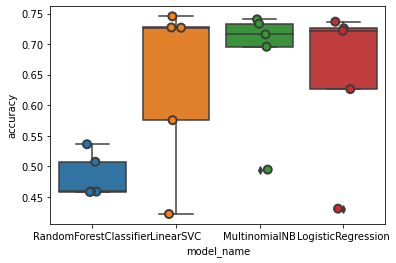

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.639511
LogisticRegression        0.648358
MultinomialNB             0.676104
RandomForestClassifier    0.484053
Name: accuracy, dtype: float64

### SVC / LOGISTIC REGRESSION / NAIVE BAYES SEEM TO WORK BEST

## NB WORKS SUPER BEST

## Naive Bayes (Apparently the best for this dataset)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


X_train, X_test, y_train, y_test = train_test_split(data["filtered_text"], data['Class'], random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [22]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Politics']


In [23]:
print(clf.predict(count_vect.transform(["A chair is a piece of furniture with a raised surface used to sit on, commonly for use by one person. Chairs are most often supported by four legs and have a back;[1][2] however, a chair can have three legs or could have a different shape.[3] A chair without a back or arm rests is a stool,[4] or when raised up, a bar stool.[5] A chair with arms is an armchair[6] and with folding action and inclining footrest, a recliner.[7] A permanently fixed chair in a train or theater is a seat[8] or, in an airplane, airline seat;[9] when riding, it is a saddle[10] and bicycle saddle,[11] and for an automobile, a car seat[12] or infant car seat.[13] With wheels it is a wheelchair[14] and when hung from above, a swing.[15] A chair for more than one person is a couch, sofa, settee, or loveseat;[16] or a bench.[17] A separate footrest for a chair is known as an ottoman,[18] hassock[19] or pouffe.[20]The chair is known for its antiquity and simplicity, although for many centuries it was an article of state and dignity rather than an article of ordinary use. The chair is still extensively used as the emblem of authority in the House of Commons in the United Kingdom and Canada, and in many other settings."])))

['Politics']


In [24]:
print(clf.predict(count_vect.transform(["RIPEM is a program which performs Privacy Enhanced Mail (PEM) using the cryptographic techniques of RSA and DES.  It allows your electronic mail to have the properties of authentication (i.e. who sent it can be confirmed) and privacy (i.e. nobody can read it except the intended recipient.) RIPEM was written primarily by Mark Riordan <mrr@scss3.cl.msu.edu>. Most of the code is in the public domain, except for the RSA routines, which are a library called RSAREF licensed from RSA Data Security Inc. RIPEM contains the library of cryptographic routines RSAREF, which is considered munitions and thus is export-restricted from distribution to people who are not citizens or permanent residents of the U.S. or Canada.  Therefore, the following request is quoted from the README file:"])))

['Science']


In [25]:
print(clf.predict(count_vect.transform(["Checking to see what on earth is going on with this thing. Can I possibly get Entertainment? Why is the entertainment no entertaining?"])))

['Science']


In [28]:
import joblib
filename="sample_data/Data/clf_model.model"
joblib.dump(clf, filename)

['sample_data/Data/clf_model.model']